# Text Mining of Echo Dot (3rd Gen) - Smart speaker with Alexa (Black)
##source:- Amazon

#Import Libraries

In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

#Multi-page web-scraping

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/Echo-Dot-3rd-Gen/dp/B07PFFMP9P/ref=sr_1_2?crid=2EUNMTBXOI2G5&keywords=echo+dot+3th+generation&qid=1689849390&sprefix=echo+dot+th+generation%2Caps%2C258&sr=8-2',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


#Looping through multiple pages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

##Save results to a Dataframe, then export as CSV

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nBetter Then Google home Mini,4.0,I have 2 Google home mini and just received my...,Reviewed in India on 18 July 2023
1,4.0 out of 5 stars\nGood entertainment,4.0,It will really reduce our work from getting up...,Reviewed in India on 16 July 2023
2,4.0 out of 5 stars\nWorth every penny,4.0,Using this for a long time. Very nice quality ...,Reviewed in India on 14 July 2023
3,"4.0 out of 5 stars\nReceived today, I find it ...",4.0,The media could not be loaded.\n ...,Reviewed in India on 18 July 2023
4,4.0 out of 5 stars\nDaily need,4.0,Amazing speaker with Alexa,Reviewed in India on 28 June 2023
5,4.0 out of 5 stars\nVery good speaker. Good vo...,4.0,Very useful for home,Reviewed in India on 12 July 2023
6,3.0 out of 5 stars\nGoogle Assistant is better...,3.0,I have been using Alexa for a very long period...,Reviewed in India on 16 July 2023
7,4.0 out of 5 stars\ntechinal issue,4.0,hey purchased echo dot in 2020 and now it sudd...,Reviewed in India on 9 July 2023
8,4.0 out of 5 stars\nSuper cute product,4.0,Very good product but LED not ok goloing and b...,Reviewed in India on 23 June 2023
9,5.0 out of 5 stars\nFantastic Addition to My H...,5.0,I recently purchased the Amazon Alexa 3rd Gen ...,Reviewed in India on 18 May 2023


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nBetter Then Google home Mini,4.0,I have 2 Google home mini and just received my...,18 July 2023
1,4.0 out of 5 stars\nGood entertainment,4.0,It will really reduce our work from getting up...,16 July 2023
2,4.0 out of 5 stars\nWorth every penny,4.0,Using this for a long time. Very nice quality ...,14 July 2023
3,"4.0 out of 5 stars\nReceived today, I find it ...",4.0,The media could not be loaded.\n ...,18 July 2023
4,4.0 out of 5 stars\nDaily need,4.0,Amazing speaker with Alexa,28 June 2023
5,4.0 out of 5 stars\nVery good speaker. Good vo...,4.0,Very useful for home,12 July 2023
6,3.0 out of 5 stars\nGoogle Assistant is better...,3.0,I have been using Alexa for a very long period...,16 July 2023
7,4.0 out of 5 stars\ntechinal issue,4.0,hey purchased echo dot in 2020 and now it sudd...,9 July 2023
8,4.0 out of 5 stars\nSuper cute product,4.0,Very good product but LED not ok goloing and b...,23 June 2023
9,5.0 out of 5 stars\nFantastic Addition to My H...,5.0,I recently purchased the Amazon Alexa 3rd Gen ...,18 May 2023


In [9]:
df.to_csv("EchoDot_Review.csv")

#3. Load Dataset

In [10]:
reviews = pd.read_csv('EchoDot_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nBetter Then Google home Mini,4.0,I have 2 Google home mini and just received my...,18 July 2023
1,4.0 out of 5 stars\nGood entertainment,4.0,It will really reduce our work from getting up...,16 July 2023
2,4.0 out of 5 stars\nWorth every penny,4.0,Using this for a long time. Very nice quality ...,14 July 2023
3,"4.0 out of 5 stars\nReceived today, I find it ...",4.0,The media could not be loaded.\n ...,18 July 2023
4,4.0 out of 5 stars\nDaily need,4.0,Amazing speaker with Alexa,28 June 2023
5,4.0 out of 5 stars\nVery good speaker. Good vo...,4.0,Very useful for home,12 July 2023
6,3.0 out of 5 stars\nGoogle Assistant is better...,3.0,I have been using Alexa for a very long period...,16 July 2023
7,4.0 out of 5 stars\ntechinal issue,4.0,hey purchased echo dot in 2020 and now it sudd...,9 July 2023
8,4.0 out of 5 stars\nSuper cute product,4.0,Very good product but LED not ok goloing and b...,23 June 2023
9,5.0 out of 5 stars\nFantastic Addition to My H...,5.0,I recently purchased the Amazon Alexa 3rd Gen ...,18 May 2023


#Data Exploration

In [11]:
reviews.Rating.describe()

count    10.000000
mean      4.000000
std       0.471405
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


In [13]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [14]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nBetter Then Google home Mini,4.0,I have 2 Google home mini and just received my...,18 July 2023
1,4.0 out of 5 stars\nGood entertainment,4.0,It will really reduce our work from getting up...,16 July 2023
2,4.0 out of 5 stars\nWorth every penny,4.0,Using this for a long time. Very nice quality ...,14 July 2023
3,"4.0 out of 5 stars\nReceived today, I find it ...",4.0,The media could not be loaded.\n ...,18 July 2023
4,4.0 out of 5 stars\nDaily need,4.0,Amazing speaker with Alexa,28 June 2023


#Data Visualization

##Date vs Review Count

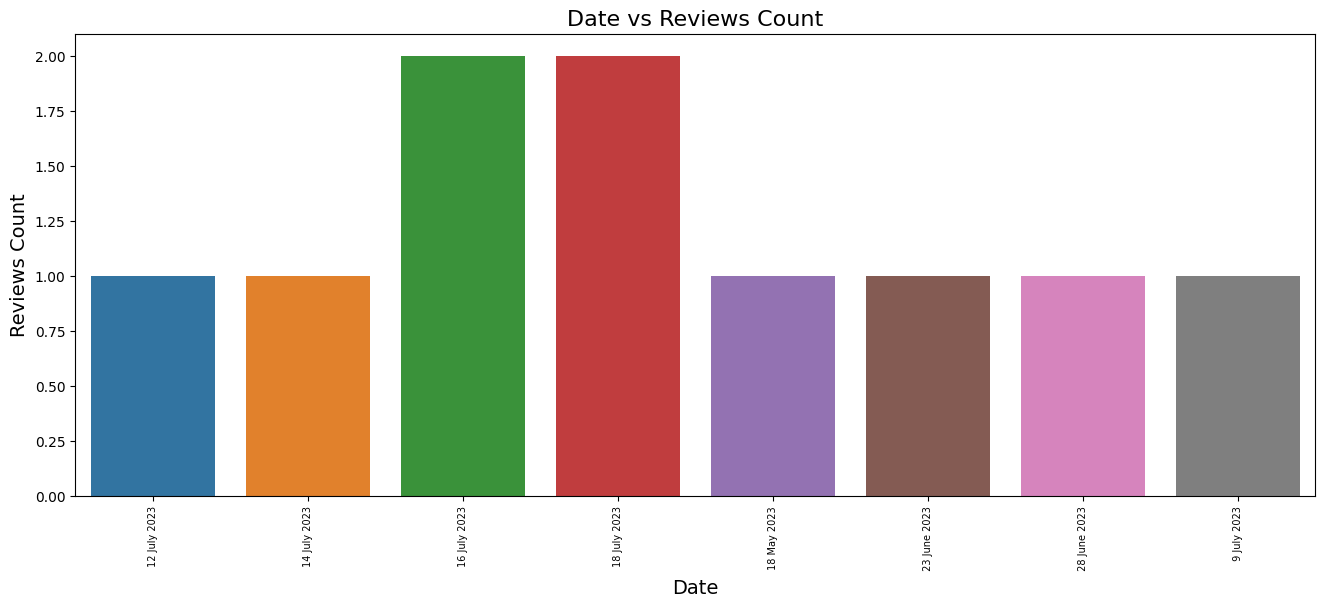

In [15]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

#Percentage of Ratings

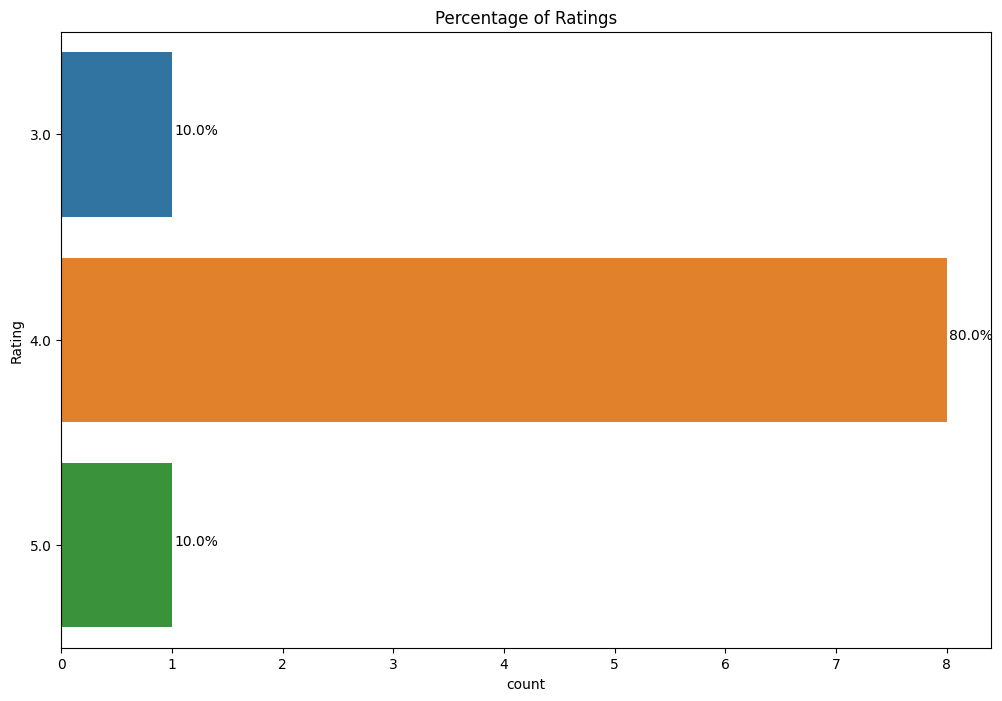

In [16]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#BasicText Preprocessing for Sentiment Analysis
###Spelling Correction

In [17]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I have 2 Google home mind and just received my...
1    It will really reduce our work from getting up...
2    Using this for a long time. Very nice quality ...
3    The media could not be loaded.\n              ...
4                            Amazing speaker with Plea
Name: Review, dtype: object

In [18]:
EchoDot_Review= reviews[['Review']]
EchoDot_Review

,Review
0,I have 2 Google home mini and just received my...
1,It will really reduce our work from getting up...
2,Using this for a long time. Very nice quality ...
3,The media could not be loaded.\n ...
4,Amazing speaker with Alexa
5,Very useful for home
6,I have been using Alexa for a very long period...
7,hey purchased echo dot in 2020 and now it sudd...
8,Very good product but LED not ok goloing and b...
9,I recently purchased the Amazon Alexa 3rd Gen ...


#Resetting index

In [19]:
!pip install nltk



In [20]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
EchoDot_Review.reset_index(drop=True, inplace=True)

In [22]:
stop_words = stopwords.words('english')
EchoDot_Review['Review'] = EchoDot_Review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


#Lemmatizer

In [23]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(EchoDot_Review))):
    cleaned = re.sub('[^a-zA-Z]', " ", EchoDot_Review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": EchoDot_Review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...
2,using long time nice quality product,using long time. very nice quality product
3,medium could loaded received today find intere...,"the media could loaded. received today, i find..."
4,amazing speaker alexa,amazing speaker alexa


#Text Pre-processing Techniques
##A. Removing '@names'

In [25]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [26]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...
2,using long time nice quality product,using long time. very nice quality product
3,medium could loaded received today find intere...,"the media could loaded. received today, i find..."
4,amazing speaker alexa,amazing speaker alexa
5,useful home,very useful home
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...
8,good product led ok goloing blinking,very good product led ok goloing blinking
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...


##B. Removing links (http | https)

In [27]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...
2,using long time nice quality product,using long time. very nice quality product
3,medium could loaded received today find intere...,"the media could loaded. received today, i find..."
4,amazing speaker alexa,amazing speaker alexa
5,useful home,very useful home
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...
8,good product led ok goloing blinking,very good product led ok goloing blinking
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...


##C. Removing Review with empty text

In [28]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...
2,using long time nice quality product,using long time. very nice quality product
3,medium could loaded received today find intere...,"the media could loaded. received today, i find..."
4,amazing speaker alexa,amazing speaker alexa
5,useful home,very useful home
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...
8,good product led ok goloing blinking,very good product led ok goloing blinking
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...



##D. Dropping duplicate rows

In [29]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...
2,using long time nice quality product,using long time. very nice quality product
3,medium could loaded received today find intere...,"the media could loaded. received today, i find..."
4,amazing speaker alexa,amazing speaker alexa
5,useful home,very useful home
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...
8,good product led ok goloing blinking,very good product led ok goloing blinking
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...


##E. Function to remove emoji

In [30]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [31]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...
2,using long time nice quality product,using long time. very nice quality product
3,medium could loaded received today find intere...,"the media could loaded. received today, i find..."
4,amazing speaker alexa,amazing speaker alexa
5,useful home,very useful home
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...
8,good product led ok goloing blinking,very good product led ok goloing blinking
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...


##F. Removing Stop words

In [32]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [33]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [34]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...
2,using long time nice quality product,using long time. very nice quality product
3,medium could loaded received today find intere...,"the media could loaded. received today, i find..."
4,amazing speaker alexa,amazing speaker alexa
5,useful home,very useful home
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...
8,good product led ok goloing blinking,very good product led ok goloing blinking
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...


#Tokenize 'Clean_Reviews'

In [35]:
nltk.download('punkt')
TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['really', 'reduce', 'work', 'getting', 'turn', 'light', 'work', 'easily', 'voice', 'command'])

In [36]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [google, home, mini, received, first, eco, dot...
1    [really, reduce, work, getting, turn, light, w...
2          [using, long, time, nice, quality, product]
3    [medium, could, loaded, received, today, find,...
4                            [amazing, speaker, alexa]
5                                       [useful, home]
6    [using, alexa, long, period, time, overall, fe...
7    [hey, purchased, echo, dot, suddenly, stopped,...
8          [good, product, led, ok, goloing, blinking]
9    [recently, purchased, amazon, alexa, rd, gen, ...
Name: Clean_Reviews, dtype: object

In [37]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...,"[google, home, mini, received, first, eco, dot..."
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...,"[really, reduce, work, getting, turn, light, w..."
2,using long time nice quality product,using long time. very nice quality product,"[using, long, time, nice, quality, product]"
3,medium could loaded received today find intere...,"the media could loaded. received today, i find...","[medium, could, loaded, received, today, find,..."
4,amazing speaker alexa,amazing speaker alexa,"[amazing, speaker, alexa]"
5,useful home,very useful home,"[useful, home]"
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...,"[using, alexa, long, period, time, overall, fe..."
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...,"[hey, purchased, echo, dot, suddenly, stopped,..."
8,good product led ok goloing blinking,very good product led ok goloing blinking,"[good, product, led, ok, goloing, blinking]"
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...,"[recently, purchased, amazon, alexa, rd, gen, ..."


##Converting words to Stemmer

In [38]:
stemmer = SnowballStemmer("english")

In [39]:
st = pd.DataFrame()
st['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
st

,stemmed
0,googl home mini receiv first eco dot surpris f...
1,realli reduc work get turn light work easili v...
2,use long time nice qualiti product
3,medium could load receiv today find interest got
4,amaz speaker alexa
5,use home
6,use alexa long period time overal featur alexa...
7,hey purchas echo dot sudden stop work find goo...
8,good product led ok golo blink
9,recent purchas amazon alexa rd gen smart speak...


##Converting words to Lemma

In [40]:
word_lemmatizer = WordNetLemmatizer()
lem = pd.DataFrame()
lem['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
lem

,stemmed
0,google home mini received first eco dot surpri...
1,really reduce work getting turn light work eas...
2,using long time nice quality product
3,medium could loaded received today find intere...
4,amazing speaker alexa
5,useful home
6,using alexa long period time overall feature a...
7,hey purchased echo dot suddenly stopped workin...
8,good product led ok goloing blinking
9,recently purchased amazon alexa rd gen smart s...


#8. Basic Feature Extaction
##A. Applying bag of Words without N grams

In [41]:
!pip install -U scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [43]:
print(cv.get_feature_names_out()[109:200])

['life' 'light' 'like' 'link' 'listening' 'loaded' 'long' 'looking' 'love'
 'made' 'major' 'make' 'making' 'many' 'medium' 'microphone' 'mind' 'mini'
 'minute' 'modern' 'much' 'music' 'must' 'mute' 'natural' 'network' 'news'
 'nice' 'notch' 'offer' 'ok' 'one' 'outstanding' 'overall' 'part'
 'particularly' 'peace' 'performs' 'period' 'personal' 'phenomenal' 'pick'
 'play' 'playing' 'playlist' 'please' 'pleasing' 'podcasts' 'privacy'
 'probably' 'process' 'processing' 'produce' 'product' 'profile'
 'promptly' 'properly' 'provide' 'provides' 'purchased' 'quality'
 'question' 'quickly' 'rd' 'really' 'received' 'recently' 'recognition'
 'recommend' 'reduce' 'regard' 'reminder' 'responds' 'resulting' 'rich'
 'room' 'routine' 'say' 'seamless' 'seamlessly' 'setting' 'setup' 'shop'
 'shopping' 'show' 'simply' 'size' 'sleek' 'smart' 'smarter' 'song']


In [44]:
print(cv.get_feature_names_out()[:100])

['ability' 'account' 'accurately' 'across' 'add' 'addition' 'addressing'
 'aesthetically' 'alarm' 'alexa' 'allows' 'also' 'always' 'amazing'
 'amazon' 'answer' 'anyone' 'app' 'application' 'appreciate' 'asking'
 'assistant' 'audio' 'balanced' 'bass' 'beck' 'become' 'benefit' 'better'
 'blending' 'blinking' 'bonus' 'breeze' 'buying' 'call' 'capability'
 'checked' 'checking' 'clear' 'command' 'commerce' 'compact' 'compared'
 'compatible' 'concern' 'connect' 'control' 'controlling' 'convenient'
 'could' 'crisp' 'daily' 'decor' 'deep' 'design' 'device' 'dot' 'easily'
 'echo' 'eco' 'effortlessly' 'elegance' 'enhance' 'enjoy' 'ensuring'
 'essential' 'even' 'exceptional' 'experience' 'fabric' 'far' 'faster'
 'favorite' 'feature' 'fi' 'fill' 'filter' 'find' 'finish' 'first' 'fit'
 'foremost' 'gana' 'gen' 'get' 'getting' 'go' 'goloing' 'good' 'google'
 'got' 'great' 'guided' 'help' 'hey' 'higher' 'home' 'imagine'
 'impressive' 'information']


In [45]:
print(tweetscv.toarray()[100:200])

[]


##CountVectorizer with N-grams (Bigrams & Trigrams)

In [46]:
dataframe = dataframe.reset_index(drop=True)

In [47]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [48]:
corpus[3]

'medium could load receiv today find interest got'

##Applying Countvectorizer (Creating the Bag of Words model)

In [49]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [50]:
X.shape

(10, 904)

In [51]:
cv.get_feature_names_out()[:20]

array(['abil', 'abil mute', 'abil mute microphon', 'account',
       'account buy', 'account buy faster', 'account intuit',
       'account intuit alexa', 'accur', 'accur pick', 'accur pick voic',
       'across', 'across room', 'across room play', 'add', 'add touch',
       'add touch eleg', 'addit', 'addit home', 'addit home except'],
      dtype=object)

In [52]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [53]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,abil,abil mute,abil mute microphon,account,account buy,account buy faster,account intuit,account intuit alexa,accur,accur pick,...,work easili voic,work find,work find good,work get,work get turn,work properli,work properli speaker,youtub,youtub gana,youtub gana applic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


#TF-IDF Vectorizer

In [54]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [55]:
corpus[4]

'amaz speaker alexa'

##Applying TF-IDF Vectorizer

In [56]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [57]:
X.shape

(10, 904)

In [58]:
tfidf_v.get_feature_names_out()[:20]

array(['abil', 'abil mute', 'abil mute microphon', 'account',
       'account buy', 'account buy faster', 'account intuit',
       'account intuit alexa', 'accur', 'accur pick', 'accur pick voic',
       'across', 'across room', 'across room play', 'add', 'add touch',
       'add touch eleg', 'addit', 'addit home', 'addit home except'],
      dtype=object)

In [59]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [60]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,abil,abil mute,abil mute microphon,account,account buy,account buy faster,account intuit,account intuit alexa,accur,accur pick,...,work easili voic,work find,work find good,work get,work get turn,work properli,work properli speaker,youtub,youtub gana,youtub gana applic
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164031,0.164031,0.164031
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.198924,0.000000,0.000000,0.198924,0.198924,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.059808,0.070355,0.070355,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.070355,0.070355,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.166286,0.166286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.031438,0.031438,0.031438,0.026725,0.000000,0.000000,0.031438,0.031438,0.031438,0.031438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#Named Entity Recognition (NER)

In [61]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'google home mini received first eco dot surprise far play youtube gana application song really reduce work getting turn light work easily voice command using long time nice quality product medium could loaded received today find interesting got amazing speaker alexa useful home using alexa long period time overall feature alexa le compared google assistant google better natural language processing google also provides better answer compared alexa shopping provide product various e commerce website unlike alexa show product amazon one major issue alexa answer many question filter probably work properly speaker quality really good go bonus tip link product amazon account buying faster setup love feature hey purchased echo dot suddenly stopped working find good shop get checked please help good product led ok goloing blinking recently purchased amazon alexa rd gen smart speaker amazon must say quickly become essential part daily routine device simply outstanding imagine life without firs

##Parts Of Speech (POS) Tagging

In [62]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [63]:
for token in doc_block[:50]:
    print(token,token.pos_)

google PROPN
home PROPN
mini PROPN
received VERB
first ADJ
eco NOUN
dot NOUN
surprise NOUN
far ADV
play VERB
youtube NOUN
gana NOUN
application NOUN
song NOUN
really ADV
reduce VERB
work NOUN
getting VERB
turn NOUN
light ADJ
work NOUN
easily ADV
voice NOUN
command NOUN
using VERB
long ADJ
time NOUN
nice ADJ
quality NOUN
product NOUN
medium NOUN
could AUX
loaded VERB
received VERB
today NOUN
find VERB
interesting ADJ
got VERB
amazing ADJ
speaker NOUN
alexa PROPN
useful ADJ
home NOUN
using VERB
alexa ADJ
long ADJ
period NOUN
time NOUN
overall ADJ
feature NOUN


##Filtering the nouns and verbs only

In [64]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['bass', 'resulting', 'profile', 'voice', 'recognition', 'capability', 'alexa', 'pick', 'voice', 'command', 'room', 'playing', 'music', 'volume', 'responds', 'provides', 'information', 'performs', 'task', 'setting', 'reminder', 'alarm', 'checking', 'weather', 'controlling', 'home', 'device', 'assistant', 'beck', 'call', 'appreciate', 'design', 'amazon', 'size', 'allows', 'room', 'taking', 'space', 'fabric', 'finish', 'add', 'touch', 'elegance', 'making', 'blending', 'home', 'decor', 'setup', 'process', 'took', 'minute', 'connect', 'speaker', 'account', 'app', 'guided', 'process', 'step', 'step', 'ensuring', 'setup', 'experience', 'feature', 'enjoy', 'integration', 'device', 'control', 'thermostat', 'tv', 'using', 'voice', 'command', 'alexa', 'made', 'home', 'term', 'privacy', 'amazon', 'made', 'addressing', 'concern', 'ability', 'microphone', 'provides', 'peace', 'mind', 'want', 'listening', 'transparency', 'control', 'offer', 'regard', 'speaker', 'addition', 'quality', 'voice', 'recog

##Counting the noun & verb tokens

In [65]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,speaker,6
1,voice,5
2,product,5
3,home,5
4,device,5
5,quality,4
6,setup,4
7,work,3
8,command,3
9,using,3


##Visualizing results (Barchart for top 10 nouns + verbs)

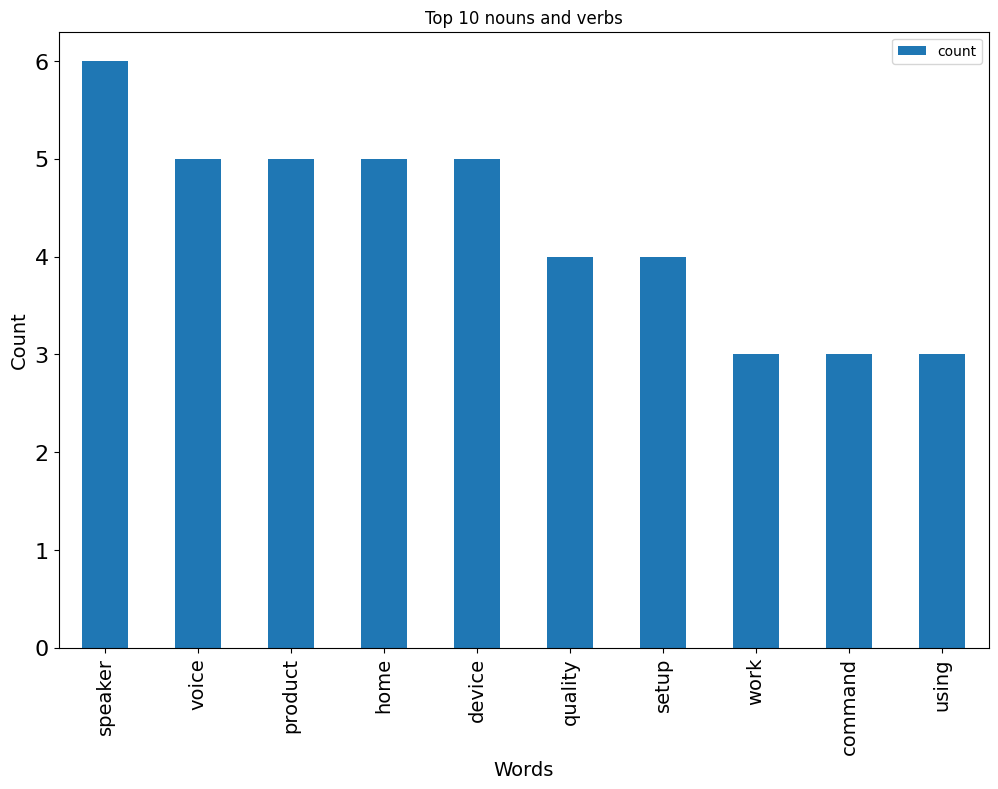

In [66]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#. Feature Extraction
##A. BOW Features

In [67]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

##B. TF-IDF Features

In [68]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [69]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,10


##Let's calculate subjectivity and Polarity

In [70]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...,"[google, home, mini, received, first, eco, dot...",0.666667,0.175000
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...,"[really, reduce, work, getting, turn, light, w...",0.577778,0.344444
2,using long time nice quality product,using long time. very nice quality product,"[using, long, time, nice, quality, product]",0.700000,0.275000
3,medium could loaded received today find intere...,"the media could loaded. received today, i find...","[medium, could, loaded, received, today, find,...",0.500000,0.500000
4,amazing speaker alexa,amazing speaker alexa,"[amazing, speaker, alexa]",0.900000,0.600000


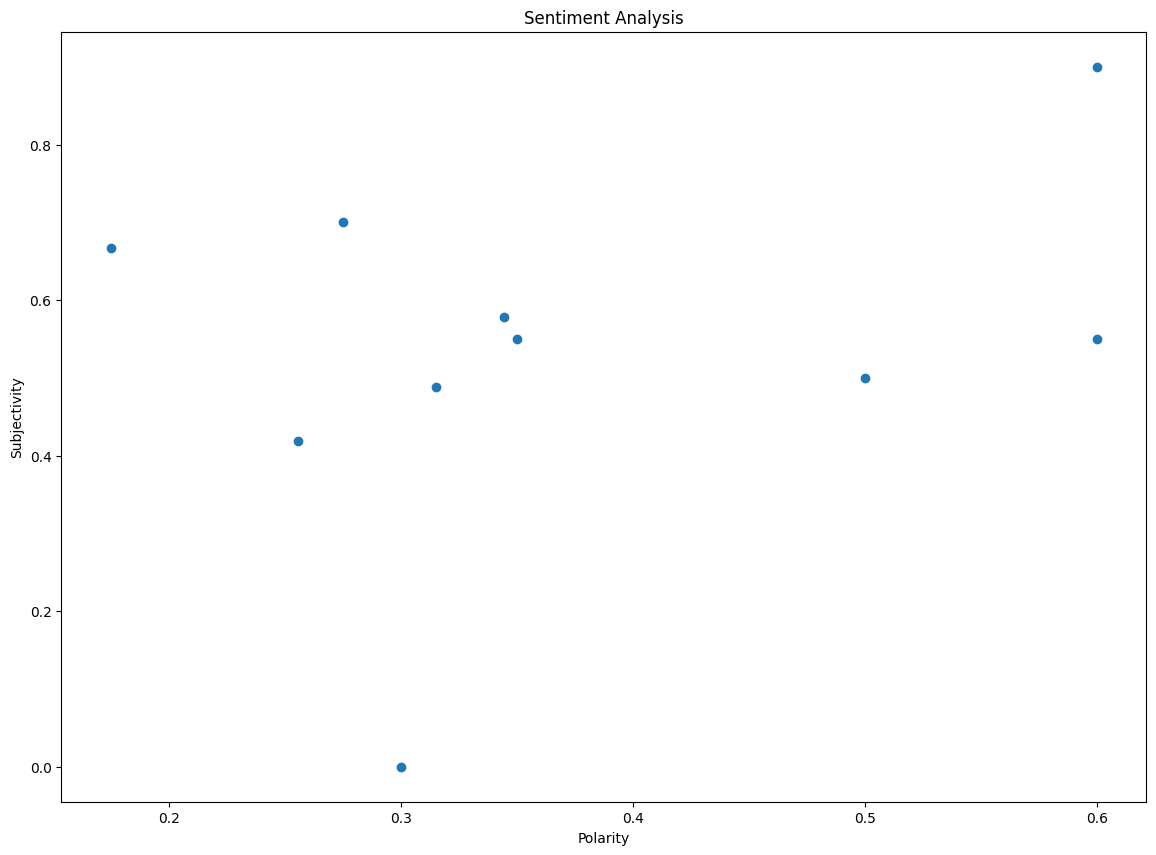

In [71]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [72]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head(20)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,google home mini received first eco dot surpri...,i 2 google home mini received first eco dot su...,"[google, home, mini, received, first, eco, dot...",0.666667,0.175000,pos
1,really reduce work getting turn light work eas...,it really reduce work getting turn light works...,"[really, reduce, work, getting, turn, light, w...",0.577778,0.344444,pos
2,using long time nice quality product,using long time. very nice quality product,"[using, long, time, nice, quality, product]",0.700000,0.275000,pos
3,medium could loaded received today find intere...,"the media could loaded. received today, i find...","[medium, could, loaded, received, today, find,...",0.500000,0.500000,pos
4,amazing speaker alexa,amazing speaker alexa,"[amazing, speaker, alexa]",0.900000,0.600000,pos
5,useful home,very useful home,"[useful, home]",0.000000,0.300000,pos
6,using alexa long period time overall feature a...,i using alexa long period time overall feature...,"[using, alexa, long, period, time, overall, fe...",0.418182,0.255682,pos
7,hey purchased echo dot suddenly stopped workin...,hey purchased echo dot 2020 suddenly stopped w...,"[hey, purchased, echo, dot, suddenly, stopped,...",0.550000,0.350000,pos
8,good product led ok goloing blinking,very good product led ok goloing blinking,"[good, product, led, ok, goloing, blinking]",0.550000,0.600000,pos
9,recently purchased amazon alexa rd gen smart s...,i recently purchased amazon alexa 3rd gen smar...,"[recently, purchased, amazon, alexa, rd, gen, ...",0.488231,0.315016,pos


#Story Generation and Visualization

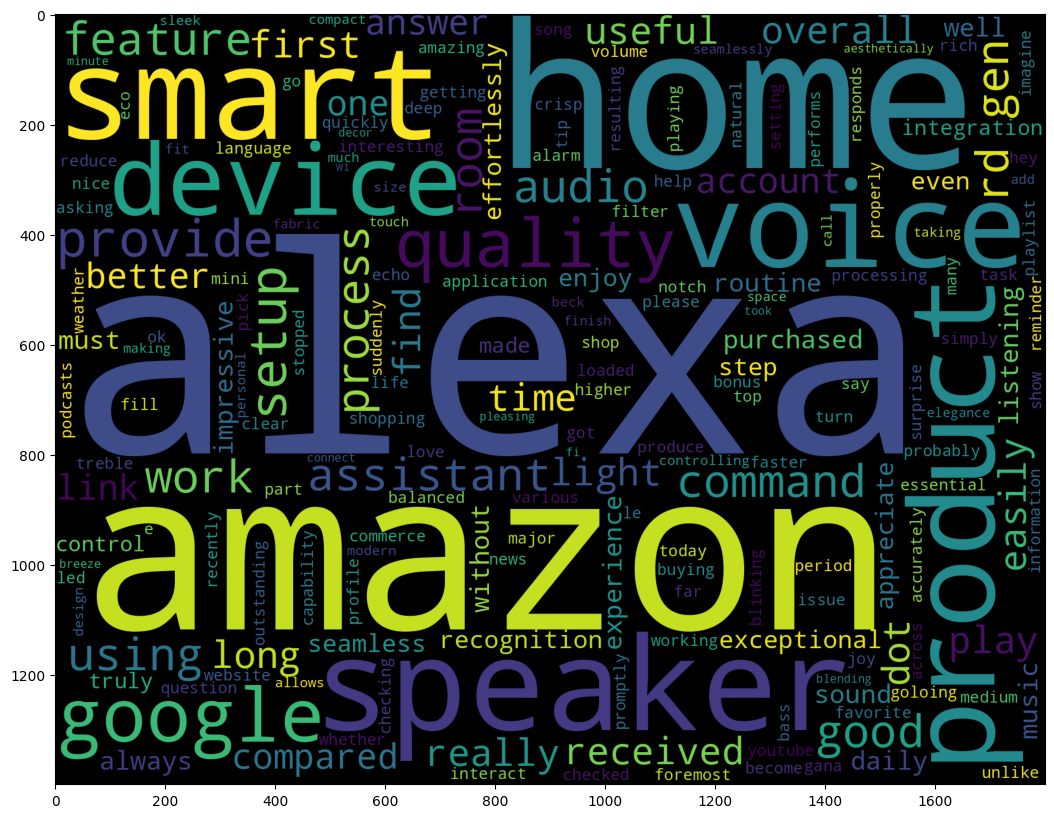

In [73]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

##A. Most common words in positive Review

In [74]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

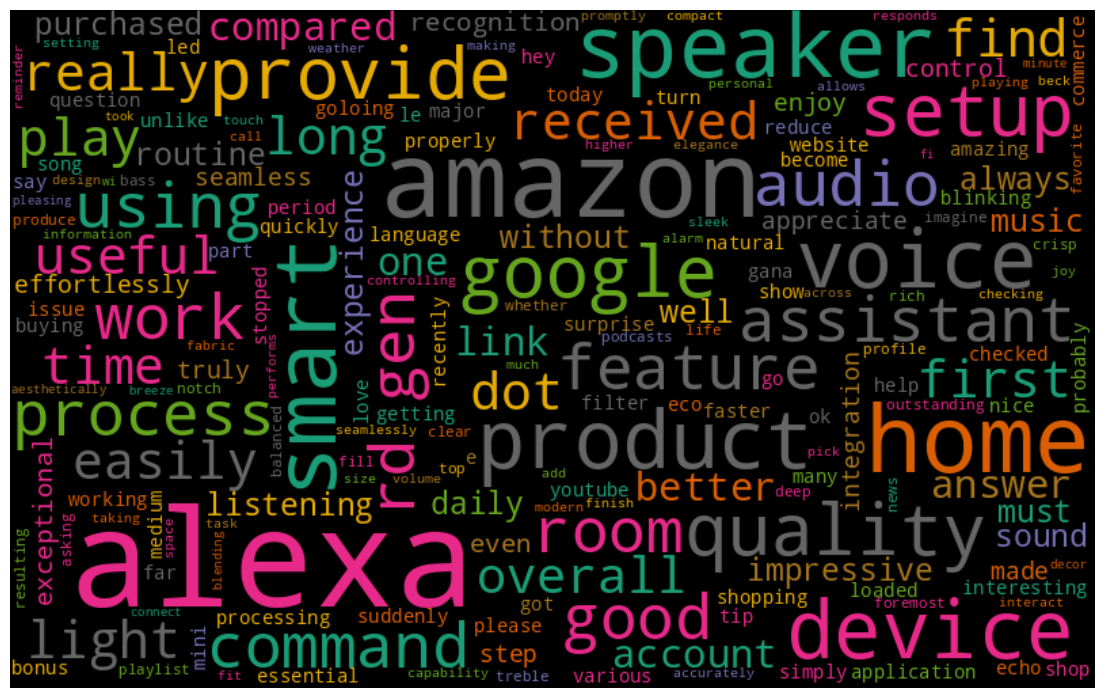

In [75]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

##B. Most common words in negative Review

In [76]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

ValueError: ignored